In [117]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize,Bounds

In [118]:
#S&P 500, Gold, Tesla, 3M ,Caterpillar, Apple, Brent Crude Oil
tickers = ['^GSPC','GC=F','TSLA','MMM','CAT','AAPL','BZ=F']

In [119]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']
df 

[*********************100%***********************]  7 of 7 completed


,AAPL,BZ=F,CAT,GC=F,MMM,TSLA,^GSPC
Date,,,,,,,
2010-01-04,6.505280,80.120003,41.156902,1117.699951,56.705288,NaN,1132.989990
2010-01-05,6.516528,80.589996,41.648968,1118.099976,56.350121,NaN,1136.520020
2010-01-06,6.412873,81.889999,41.775486,1135.900024,57.149288,NaN,1137.140015
2010-01-07,6.401017,81.510002,41.944206,1133.099976,57.190277,NaN,1141.689941
2010-01-08,6.443575,81.370003,42.415173,1138.199951,57.593269,NaN,1144.979980
...,...,...,...,...,...,...,...
2023-03-09,150.589996,81.589996,240.960007,1829.300049,105.519997,172.919998,3918.320068
2023-03-10,148.500000,82.779999,227.009995,1862.000000,104.059998,173.440002,3861.590088
2023-03-13,150.470001,80.769997,224.699997,1911.699951,103.500000,174.479996,3855.760010


In [120]:
#log returns 
#Window operation; row wise divided by the previous row P/P-1, where P=price
ret_df = np.log(df/df.shift(1))

In [121]:
#correlation
ret_df.corr()

,AAPL,BZ=F,CAT,GC=F,MMM,TSLA,^GSPC
AAPL,1.000000,0.184906,0.416001,0.050981,0.433163,0.360033,0.690801
BZ=F,0.184906,1.000000,0.362370,0.131811,0.200148,0.154338,0.320400
CAT,0.416001,0.362370,1.000000,0.054325,0.619784,0.240566,0.691322
GC=F,0.050981,0.131811,0.054325,1.000000,0.014176,0.054882,0.044880
MMM,0.433163,0.200148,0.619784,0.014176,1.000000,0.228894,0.706510
TSLA,0.360033,0.154338,0.240566,0.054882,0.228894,1.000000,0.430231
^GSPC,0.690801,0.320400,0.691322,0.044880,0.706510,0.430231,1.000000


<AxesSubplot: xlabel='Date'>

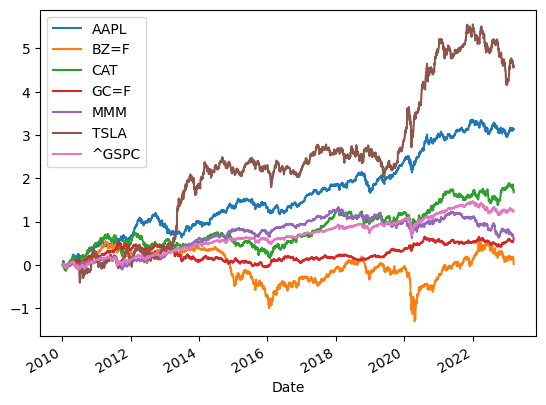

In [122]:
#cumulative sum
ret_df.cumsum().plot()

In [123]:
# mean of returns/ average ruturn
ret_df.mean()

AAPL     0.000945
BZ=F     0.000006
CAT      0.000505
GC=F     0.000180
MMM      0.000186
TSLA     0.001435
^GSPC    0.000374
dtype: float64

In [124]:
# Risk -> volatility
ret_df.std()

AAPL     0.018064
BZ=F     0.023566
CAT      0.018505
GC=F     0.010202
MMM      0.013941
TSLA     0.035998
^GSPC    0.011234
dtype: float64

# Ideas taken from the following paper
https://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf

In [125]:
#weight vector with the assumption that all the assets have equal weights
W = np.ones(len(ret_df.columns))/(np.ones(len(ret_df.columns))).sum()
W

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [126]:
(W * ret_df.mean()).sum()
ret_df.mean().dot(W)

0.0005187496718674314

By looking now the expected value one can observe that the expected returns of the combination is greater that the return of gold alone but lower that S&P500 alone. However, it is of crucial importance to study the risk factor, i.e. to look at the variance in order to get a glimpse about the volatility.

In [127]:
ret_df.cov()

,AAPL,BZ=F,CAT,GC=F,MMM,TSLA,^GSPC
AAPL,0.000326,0.000078,0.000139,0.000009,0.000109,0.000233,0.000140
BZ=F,0.000078,0.000555,0.000157,0.000032,0.000066,0.000132,0.000084
CAT,0.000139,0.000157,0.000342,0.000010,0.000160,0.000158,0.000144
GC=F,0.000009,0.000032,0.000010,0.000104,0.000002,0.000020,0.000005
MMM,0.000109,0.000066,0.000160,0.000002,0.000194,0.000115,0.000111
TSLA,0.000233,0.000132,0.000158,0.000020,0.000115,0.001296,0.000173
^GSPC,0.000140,0.000084,0.000144,0.000005,0.000111,0.000173,0.000126


In [128]:
#portoflio variance
W[0]**2 * 0.000104 + W[1]**2 * 0.000126 + 2 * W[0] * W[1]* 0.000005


4.8979591836734685e-06

In [129]:
#portofolio_risk  
6e-05 **(1/2)

0.007745966692414834

In [130]:
#portofolio_risk 
W.T.dot(ret_df.cov().dot(W))**(1/2)

0.012038071867899782

In [131]:
ret_df.mean() / ret_df.std()

AAPL     0.052335
BZ=F     0.000240
CAT      0.027305
GC=F     0.017657
MMM      0.013309
TSLA     0.039859
^GSPC    0.033326
dtype: float64

In [132]:
#sharp ratio risk

ret_df.mean().dot(W) / (W.T.dot(ret_df.cov().dot(W))**(1/2))

0.043092421906095066

### Is the equal-weighted portfolio the optimal choice?
The goal now is to find a function to minimize to be able to find the optimal distribution of weights, which is the deciding difference from what we did above, where the weights were just equally distributed among the assets. The function to be minimized is the Sharpe ratio, thus finding the negative Sharpe ratio, one maximizes the Sharpe ratio which translates to optimal returns

In [133]:
def sharpe_pf(W,returns):
    pf_risk = (W.dot(returns.cov()).dot(W)) ** 0.5
    SR = W.dot(returns.mean()) / pf_risk
    return -SR

In [134]:
#sharp ratio of equal-weighted portofolio
-sharpe_pf(W,ret_df)

0.04309242190609506

Equality constraint means that the function result is to be 0: the weights should always sum to 1.

In [135]:

#defining constraints
cons = ({'type':'eq','fun': lambda x: np.sum(x)-1})

#Minimize the sparpe ratio to find optimal weights
#Bounds (0,1) to avoid negative weights
res = minimize(sharpe_pf,W,ret_df,bounds=Bounds(0,1),constraints=cons)
res

     fun: -0.058823134703948794
     jac: array([-5.09577803e-05,  2.57438873e-02, -2.09389720e-04,  2.23238021e-05,
        1.34055968e-02,  1.94591936e-04,  7.39012565e-03])
 message: 'Optimization terminated successfully'
    nfev: 112
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([5.10458300e-01, 0.00000000e+00, 4.14328600e-02, 3.04819414e-01,
       2.05998413e-17, 1.43289426e-01, 7.10152423e-18])

In [136]:
#optimal weights vector
opt_W = res['x']

Let's now see if the optimally weighted portfolio with respect to the Sharpe ratio would perform better than the equally weighted portfolio

In [137]:
# 70% for training
train = ret_df[:int(len(ret_df) * 0.7)]
#30 for testinhg
test = ret_df[int(len(ret_df) * 0.7):]

In [138]:

res_train = minimize(sharpe_pf,W,train,bounds=Bounds(0,1),constraints=cons)
res_train

     fun: -0.06040998046575489
     jac: array([ 1.38659496e-04,  2.79574008e-02,  1.13112861e-02, -5.25871292e-05,
        8.65668990e-05, -7.38081057e-04,  3.41145648e-03])
 message: 'Optimization terminated successfully'
    nfev: 113
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([4.32664499e-01, 4.95480393e-17, 2.92734587e-17, 1.09600799e-01,
       3.42205623e-01, 1.15529078e-01, 0.00000000e+00])

In [139]:
test.dot(res_train['x']).cumsum()

Date
2019-04-03    0.006929
2019-04-04    0.000714
2019-04-05    0.007380
2019-04-08    0.013341
2019-04-09    0.007299
                ...   
2023-03-09    0.618247
2023-03-10    0.609721
2023-03-13    0.617154
2023-03-14    0.626175
2023-03-15         NaN
Length: 998, dtype: float64

In [140]:
test.dot(W).cumsum()

Date
2019-04-03    0.003802
2019-04-04   -0.005686
2019-04-05    0.002272
2019-04-08    0.005200
2019-04-09   -0.002487
                ...   
2023-03-09    0.612484
2023-03-10    0.602922
2023-03-13    0.603463
2023-03-14    0.608020
2023-03-15         NaN
Length: 998, dtype: float64

By studying the returns above one can observe that the optimally weighted portfolio outperforms the equal-weighted. Consequently, it is of crucial importance to consider how to distribute the money invested in the subsequent asset.

In [141]:
-sharpe_pf(res_train['x'],test)

0.03705787823778228

In [142]:
-sharpe_pf(W,test)

0.03867755388799338

Interestingly, the Sharpe ratio is slightly better for the equal-weighted portfolio, this can be due to the combination of assets